**Bonus_Work -2**

**Bollu Rakshith Reddy - 015998554** 

In [1]:
! pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 3.9 MB/s 
     |████████████████████████████████| 140 kB 53.4 MB/s 
     |████████████████████████████████| 384 kB 52.1 MB/s 
     |████████████████████████████████| 58 kB 1.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.13 which is incompatible.


In [2]:
!apt-get update 
!apt install chromium-chromedriver

from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [1,082 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:1

<ipython-input-2-af60f01a988f>:9: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


In [3]:
driver.get("https://twitter.com/TilburgU")

In [4]:
# make sure to login to your Twitter account first!
from bs4 import BeautifulSoup
res = driver.page_source.encode('utf-8')
soup = BeautifulSoup(res, "html.parser")

In [5]:
import pandas as pd
import numpy as np

In [6]:
def search_tweets(query):
    driver.get("https://twitter.com/search?q=" + query) 
    tweets = []
    last_height = 0
    current_height = 0

    iterator = 0
    while True: 
        iterator += 1
        
        current_height = driver.execute_script('return document.body.scrollHeight')

        if current_height == last_height: 
            break

        res = driver.page_source.encode('utf-8')
        soup = BeautifulSoup(res, "html.parser")
        data = soup.find(attrs={"data-testid": "primaryColumn"}).find_all(attrs={"data-testid":"tweet"})

        for counter in range(len(data)):
            tweet = data[counter].find_all(attrs={"dir":"auto"})

            text = tweet[4].text
            try:
                link = tweet[3]['href']
            except:
                link = '/LINK-NOT-AVAILABLE'

            tweet_data = {
                            "tweet": text, 
                            "link": "https://twitter.com/" + link
                         }

            if tweet_data not in tweets: 
                tweets.append(tweet_data)

        driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')       
        last_height = current_height
        
        if (iterator == 2): break
        
    df = pd.DataFrame(tweets)
    df.to_csv("search_tweets.csv", index=False)

collected_tweets = search_tweets('("Tilburg University" OR "Tilburg Universiteit")')# Run search

In [7]:
import time
from time import sleep

In [11]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
class SeleniumClient(object):
    def __init__(self):
        #Initialization method. 
        self.chrome_options = webdriver.ChromeOptions()
        self.chrome_options.add_argument('--headless')
        self.chrome_options.add_argument('--no-sandbox')
        self.chrome_options.add_argument('--disable-setuid-sandbox')

        # you need to provide the path of chromdriver in your system
        self.browser = webdriver.Chrome('chromedriver', options=self.chrome_options)

        self.base_url = 'https://twitter.com/search?q='

    def get_tweets(self, query):
        ''' 
        Function to fetch tweets. 
        '''
        
        self.browser.get(self.base_url+query)
        time.sleep(2)

        body = self.browser.find_element_by_tag_name('body')

        for _ in range(3000):
            body.send_keys(Keys.PAGE_DOWN)
            time.sleep(0.3)

        timeline = self.browser.find_element_by_id('timeline')
        tweet_nodes = timeline.find_elements_by_css_selector('.tweet-text')

        return pd.DataFrame({'tweets': [tweet_node.text for tweet_node in tweet_nodes]})

In [13]:
import tweepy
from tweepy import OAuthHandler
class TwitterClient(object): 
    def __init__(self):
        # Access Credentials 
        consumer_key = 'DzFjmdkX3FPe2DuU1Chq7dVL1'
        consumer_secret = '5tkOOYNbrao87OBZ8XshNZ4faLFU6YaRFR6sjysPOtW4zVfww2'
        access_token = '1601512983372263424-ayoF9uGLE68Y3IVr7YjIkM91cuD9wa'
        access_token_secret = 'qGxbRq03cfUdIWT0Ee90Rj5pdPPN9xI2UrdXB6aIq5m6A'
        try: 
            # OAuthHandler object 
            auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            self.api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            # self.api = tweepy.Client(consumer_key= consumer_key,consumer_secret= consumer_secret,access_token= access_token,access_token_secret= access_token_secret)
        except tweepy.TweepError as e:
            print(f"Error: Twitter Authentication Failed - \n{str(e)}") 

    # Function to fetch tweets
    def get_tweets(self, query, maxTweets = 1000): 
        # empty list to store parsed tweets 
        tweets = [] 
        sinceId = None
        max_id = -1
        tweetCount = 0
        tweetsPerQry = 100
        
        while tweetCount < maxTweets:
            try:
                if (max_id <= 0):
                    if (not sinceId):
                        new_tweets = self.api.search(q=query, count=tweetsPerQry)
                    else:
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                since_id=sinceId)
                else:
                    if (not sinceId):
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                max_id=str(max_id - 1))
                    else:
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                max_id=str(max_id - 1),
                                                since_id=sinceId)
                if not new_tweets:
                    print("No more tweets found")
                    break
                    
                for tweet in new_tweets:
                    parsed_tweet = {} 
                    parsed_tweet['tweets'] = tweet.text 

                    # appending parsed tweet to tweets list 
                    if tweet.retweet_count > 0: 
                        # if tweet has retweets, ensure that it is appended only once 
                        if parsed_tweet not in tweets: 
                            tweets.append(parsed_tweet) 
                    else: 
                        tweets.append(parsed_tweet) 
                tweetCount += len(new_tweets)
                print("Downloaded {0} tweets".format(tweetCount))
                max_id = new_tweets[-1].id

            except tweepy.TweepError as e:
                print("Tweepy error : " + str(e))
                break
        
        return pd.DataFrame(tweets)

/usr/local/lib/python3.8/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [201]:
selenium_client = TwitterClient()

tweets_df = selenium_client.get_tweets('fifa worldcup')

Downloaded 100 tweets
Downloaded 195 tweets
Downloaded 284 tweets
Downloaded 356 tweets
Downloaded 431 tweets
Downloaded 504 tweets
Downloaded 583 tweets
Downloaded 683 tweets
Downloaded 783 tweets
Downloaded 869 tweets
Downloaded 950 tweets
Downloaded 1029 tweets


In [202]:
tweets_df.head()

,tweets
0,RT @d_crops: dCrops sponsored a Word Cup Conte...
1,RT @RONBupdates: Big Match day: Argentina will...
2,@srinivasiyc #FIFA is going on right now. The ...
3,RT @CAM_no10: Oooh ati Ronaldo left Qatar on h...
4,"RT @ArtemBazil1o: Hello everyone, my friends. ..."


**Preprocessing**

In [203]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    if polarity_scores['neg'] > polarity_scores['pos']:
        return 'negative'
    else:
        return 'positive'

def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    # set sentiment 
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0: 
        return 'negative'
    else:
        return 'neutral'

In [204]:
import re
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
tweets_df['tidy_tweets'] = np.vectorize(remove_pattern)(tweets_df['tweets'], "@[\w]*: | *RT*")

In [205]:
tweets_df.drop_duplicates(subset=['tidy_tweets'], keep=False)

,tweets,tidy_tweets
0,RT @d_crops: dCrops sponsored a Word Cup Conte...,dCrops sponsored a Word Cup Contest to reflec...
1,RT @RONBupdates: Big Match day: Argentina will...,Big Match day: Argentina will take on Croatia...
2,@srinivasiyc #FIFA is going on right now. The ...,@srinivasiyc #FIFA is going on right now. The ...
3,RT @CAM_no10: Oooh ati Ronaldo left Qatar on h...,"Oooh ationaldo left Qatar on his private jet,..."
4,"RT @ArtemBazil1o: Hello everyone, my friends. ...","Hello everyone, my friends. Today I want to ..."
...,...,...
430,Team of FIFA World Cup 2022 Qatar (till Quarte...,Team of FIFA World Cup 2022 Qatar (till Quarte...
431,"Who is best for you in world cup, Japan or Por...","Who is best for you in world cup, Japan or Por..."
432,Check out 2021-22 Mosaic Road to the World Cup...,Check out 2021-22 Mosaicoad to the World Cup F...
433,Who will win the Golden Boot? 👞⚽✨\n\nGet more ...,Who will win the Golden Boot? 👞⚽✨\n\nGet more ...


In [206]:
tweets_df['absolute_tidy_tweets'] = tweets_df['tidy_tweets'].str.replace("[^a-zA-Z# ]", "")

In [207]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_set = set(stopwords.words("english"))
cleaned_tweets = []

for index, row in tweets_df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.absolute_tidy_tweets.split() if not word in stopwords_set]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))

tweets_df['absolute_tidy_tweets'] = cleaned_tweets

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [208]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [209]:
from nltk.stem import WordNetLemmatizer
# Tokenization
tokenized_tweet = tweets_df['absolute_tidy_tweets'].apply(lambda x: x.split())
# Finding Lemma for each word
word_lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
#joining words into sentences (from where they came from)
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

tweets_df['absolute_tidy_tweets'] = tokenized_tweet

In [210]:
tweets_df

,tweets,tidy_tweets,absolute_tidy_tweets
0,RT @d_crops: dCrops sponsored a Word Cup Conte...,dCrops sponsored a Word Cup Contest to reflec...,dCrops sponsored Word Cup Contest reflect FIFA...
1,RT @RONBupdates: Big Match day: Argentina will...,Big Match day: Argentina will take on Croatia...,Big Match day Argentina take Croatia FIFA Worl...
2,@srinivasiyc #FIFA is going on right now. The ...,@srinivasiyc #FIFA is going on right now. The ...,srinivasiyc #FIFA going right The next #WorldC...
3,RT @CAM_no10: Oooh ati Ronaldo left Qatar on h...,"Oooh ationaldo left Qatar on his private jet,...",Oooh ationaldo left Qatar private jetwe never ...
4,"RT @ArtemBazil1o: Hello everyone, my friends. ...","Hello everyone, my friends. Today I want to ...",Hello everyone friend Today I want share parti...
...,...,...,...
430,Team of FIFA World Cup 2022 Qatar (till Quarte...,Team of FIFA World Cup 2022 Qatar (till Quarte...,Team FIFA World Cup Qatar till QuarterFinals #...
431,"Who is best for you in world cup, Japan or Por...","Who is best for you in world cup, Japan or Por...",Who best world cup Japan Portugal#nfts #nft #n...
432,Check out 2021-22 Mosaic Road to the World Cup...,Check out 2021-22 Mosaicoad to the World Cup F...,Check Mosaicoad World Cup FIFA Base # Kylian M...
433,Who will win the Golden Boot? 👞⚽✨\n\nGet more ...,Who will win the Golden Boot? 👞⚽✨\n\nGet more ...,Who win Golden Boot Get update technosportsin ...


In [211]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english', max_features=50)
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(tweets_df['absolute_tidy_tweets'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english', max_features=50)
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(tweets_df['absolute_tidy_tweets'])

In [212]:
bow_word_feature

<435x50 sparse matrix of type '<class 'numpy.int64'>'
	with 1628 stored elements in Compressed Sparse Row format>

In [213]:
tweets_df

,tweets,tidy_tweets,absolute_tidy_tweets
0,RT @d_crops: dCrops sponsored a Word Cup Conte...,dCrops sponsored a Word Cup Contest to reflec...,dCrops sponsored Word Cup Contest reflect FIFA...
1,RT @RONBupdates: Big Match day: Argentina will...,Big Match day: Argentina will take on Croatia...,Big Match day Argentina take Croatia FIFA Worl...
2,@srinivasiyc #FIFA is going on right now. The ...,@srinivasiyc #FIFA is going on right now. The ...,srinivasiyc #FIFA going right The next #WorldC...
3,RT @CAM_no10: Oooh ati Ronaldo left Qatar on h...,"Oooh ationaldo left Qatar on his private jet,...",Oooh ationaldo left Qatar private jetwe never ...
4,"RT @ArtemBazil1o: Hello everyone, my friends. ...","Hello everyone, my friends. Today I want to ...",Hello everyone friend Today I want share parti...
...,...,...,...
430,Team of FIFA World Cup 2022 Qatar (till Quarte...,Team of FIFA World Cup 2022 Qatar (till Quarte...,Team FIFA World Cup Qatar till QuarterFinals #...
431,"Who is best for you in world cup, Japan or Por...","Who is best for you in world cup, Japan or Por...",Who best world cup Japan Portugal#nfts #nft #n...
432,Check out 2021-22 Mosaic Road to the World Cup...,Check out 2021-22 Mosaicoad to the World Cup F...,Check Mosaicoad World Cup FIFA Base # Kylian M...
433,Who will win the Golden Boot? 👞⚽✨\n\nGet more ...,Who will win the Golden Boot? 👞⚽✨\n\nGet more ...,Who win Golden Boot Get update technosportsin ...


In [214]:
for row in tweets_df.itertuples():
    tweet = tweets_df.at[row[0], 'absolute_tidy_tweets']
    result=fetch_sentiment_using_textblob(tweet)
    tweets_df.at[row[0], 'Sentiment']=result

In [215]:
tweets_df['Sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [216]:
tweets_df.head(100)

,tweets,tidy_tweets,absolute_tidy_tweets,Sentiment
0,RT @d_crops: dCrops sponsored a Word Cup Conte...,dCrops sponsored a Word Cup Contest to reflec...,dCrops sponsored Word Cup Contest reflect FIFA...,neutral
1,RT @RONBupdates: Big Match day: Argentina will...,Big Match day: Argentina will take on Croatia...,Big Match day Argentina take Croatia FIFA Worl...,positive
2,@srinivasiyc #FIFA is going on right now. The ...,@srinivasiyc #FIFA is going on right now. The ...,srinivasiyc #FIFA going right The next #WorldC...,positive
3,RT @CAM_no10: Oooh ati Ronaldo left Qatar on h...,"Oooh ationaldo left Qatar on his private jet,...",Oooh ationaldo left Qatar private jetwe never ...,neutral
4,"RT @ArtemBazil1o: Hello everyone, my friends. ...","Hello everyone, my friends. Today I want to ...",Hello everyone friend Today I want share parti...,neutral
...,...,...,...,...
95,Argentina will take on Croatia in the FIFA Wor...,Argentina will take on Croatia in the FIFA Wor...,Argentina take Croatia FIFA Worldcup Semifinal...,negative
96,RT @RinSSports: 1st Semi-Final Fifa World Cup ...,1st Semi-Final Fifa World Cup 2022\nArgentina...,st SemiFinal Fifa World Cup Argentina Vs Croat...,neutral
97,1st Semi-Final Fifa World Cup 2022\nArgentina ...,1st Semi-Final Fifa World Cup 2022\nArgentina ...,st SemiFinal Fifa World Cup Argentina Vs Croat...,neutral
98,RT @_iTsLxght_: @RealMetaRivals #VOLT #VDSC #V...,@ealMetaivals #VOLT #VDSC #VOLTAMY #VOLTINU #...,ealMetaivals #VOLT #VDSC #VOLTAMY #VOLTINU #FI...,neutral


In [217]:
target_variable = tweets_df['Sentiment'].apply(lambda x: 0 if x=='negative' else 1 if x=='positive' else -1 )

**Modeling**

**Gaussian NB**

In [218]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import metrics

def naive_model(X_train, X_test, y_train, y_test):
    naive_classifier = GaussianNB()
    naive_classifier.fit(X_train.toarray(), y_train)
    import joblib
    from joblib import dump

    # dump the pipeline model
    dump(naive_classifier, filename="text_classification.joblib")
    # predictions over test set
    predictions = naive_classifier.predict(X_test.toarray())
    
    # calculating f1 score
    accuracy=metrics.accuracy_score(predictions,y_test)
    print(f'Accuracy Score - {accuracy}')

In [219]:
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, target_variable, test_size=0.3, random_state=870)
naive_model(X_train, X_test, y_train, y_test)

Accuracy Score - 0.32061068702290074


In [220]:
X_train

<304x50 sparse matrix of type '<class 'numpy.int64'>'
	with 1148 stored elements in Compressed Sparse Row format>

In [221]:
X_test

<131x50 sparse matrix of type '<class 'numpy.int64'>'
	with 480 stored elements in Compressed Sparse Row format>

In [222]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, target_variable, test_size=0.3, random_state=870)
naive_model(X_train, X_test, y_train, y_test)

Accuracy Score - 0.32061068702290074


In [223]:
from google.colab import files
files.download('text_classification.joblib') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**XG BOOST**

In [259]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [260]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, target_variable, random_state=870, test_size=.30)

In [261]:
print("**RANDOM FOREST CLASSIFIER**")
rf_clf = RandomForestClassifier(max_depth = 3, random_state = 100)
rf_clf.fit(X_train,y_train)
rf_clf_pd = rf_clf.predict(X_test)

**RANDOM FOREST CLASSIFIER**


In [262]:
accuracy=accuracy_score(y_test,rf_clf_pd)
print(accuracy)

0.7251908396946565


**Comparison**

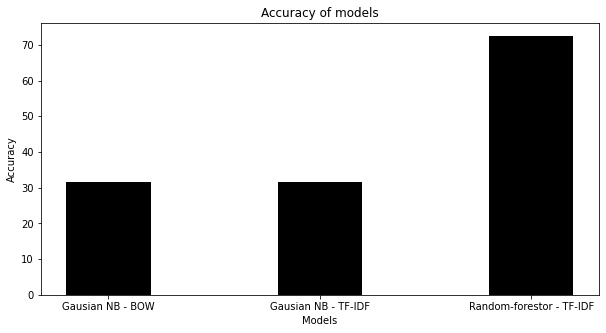

In [264]:
import matplotlib.pyplot as plt
data = {'Gausian NB - BOW':31.7, 'Gausian NB - TF-IDF':31.7, 'Random-forestor - TF-IDF' : 72.5,
        }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='black',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of models")

plt.savefig("accuracy.pdf")